# Calculate dimensionality reduction and visualize

## Imports

In [1]:
import scanpy as sc
import os

from skin_ilc_util import cm_purple_scatter, subplots_fixed_width

## Load data

In [2]:
data_dir = os.path.join('.', 'data')
adata_variable_fname = os.path.join(data_dir, 'sct_variable.h5ad')

In [3]:
adata = sc.read(adata_variable_fname)

## Draw graph

In [4]:
redo_calculations = True
# redo_calculations = False

In [5]:
adata.X = adata.layers['scale_data']
adata.raw = None

# # Subsample
#adata = adata[np.random.choice(adata.shape[0], 1000, replace = False),:]

/data/Development/Work/PsoriasisILC/pso_ilc_conda/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../Work/PsoriasisILC/pso_ilc_conda/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/data/Development/Work/PsoriasisILC/pso_ilc_conda/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for

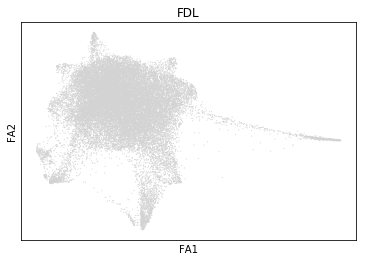

In [6]:
if redo_calculations:
    n_pcs = 20
    n_neighbors = 30

    sc.pp.pca(adata)
    sc.pp.neighbors(adata, n_pcs = n_pcs, n_neighbors = n_neighbors)
    sc.tl.diffmap(adata)
    sc.tl.draw_graph(adata)
    adata.write(adata_variable_fname)
ax = sc.pl.draw_graph(adata, show = False, title = 'FDL')

Copy over to full matrix

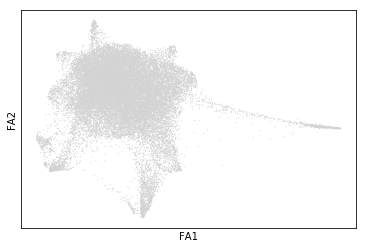

In [7]:
if redo_calculations:
    adata_full_fname = os.path.join(data_dir, 'sct.h5ad')
    adata_full = sc.read(adata_full_fname)

    adata_full.obsm['X_draw_graph_fa'] = adata.obsm['X_draw_graph_fa'].copy()
    adata_full.uns['draw_graph'] = adata.uns['draw_graph'].copy()

    sc.pl.draw_graph(adata_full)
    adata_full.write(adata_full_fname)